In [3]:
# Load layers
from keras.layers import Input, Dense
import matplotlib.image as img
from scipy.cluster.vq import kmeans, vq, whiten
import seaborn as sns, pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from keras.models import Sequential
import tensorflow as tf
from keras.models import Model
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import numpy as np



Using TensorFlow backend.


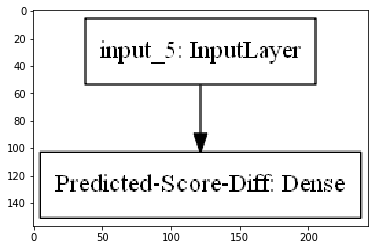

In [30]:
# Input layer (from previous exercise)
input_tensor = Input(shape=(1,))

# Create a dense layer
output_layer = Dense(1)

# Connect the dense layer to the input_tensor

output_layer= Dense(1, activation='linear',name="Predicted-Score-Diff")
output_tensor= output_layer(input_tensor)

model= Model(input_tensor, output_tensor)

model.compile(optimizer='adam',loss='mae')

plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()



353
Train on 8616 samples, validate on 2154 samples
Epoch 1/1
8616/8616 [==============================] - 0s 16us/step - loss: nan - val_loss: nan


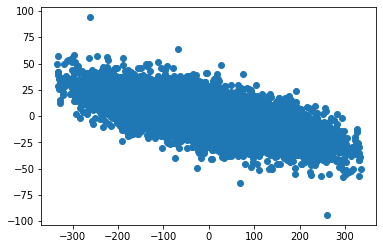

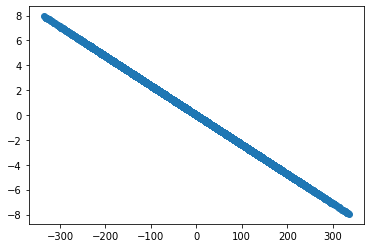

In [31]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import Flatten

df=pd.read_csv('predictions.csv')
#print(df.head())

n_teams=pd.unique(df['team']).shape[0]

print(n_teams)

#embed_layer= Embedding(input_dim=n_teams
#                       ,input_length=1
#                      ,output_dim=1
#                       ,name='Team-strength'
#                      )

#embed_tensor=embed_layer(input_tensor)

#flatten_tensor=Flatten()(embed_tensor)

#model=Model(input_tensor,flatten_tensor)
#model.compile(optimizer='adam',loss='mae')

#print(df[['team','opponent','team_score','opp_score','rank','opp_rank']])

df['score_diff']=df['team_score']-df['opp_score']
df['seed_diff']=df['rank']-df['opp_rank']

#map=['V','H']
data=df['location']
values=array(data)
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(values)
#print(integer_encoded)
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)
df['location']=integer_encoded

X_train, X_test, y_train, y_test = train_test_split(df['seed_diff'],df['score_diff'].values,test_size=0.3,random_state=42)

model.fit(df['seed_diff']
         ,df['score_diff']
          ,batch_size=64
    
          ,validation_split=.20
          ,verbose=True
         )

#model.fit(X_train
#         ,y_train
#          ,batch_size=64
#          ,validation_split=.20
#          ,verbose=True
#         )

plt.scatter(df['seed_diff'],df['score_diff'])
plt.show()

in_data_1=df['seed_diff']
pred=model.predict(in_data_1)
#pred=model.predict(X_test.values)
#print(pred)

#plt.scatter(X_test,pred)
plt.scatter(df['seed_diff'],pred)
plt.show()

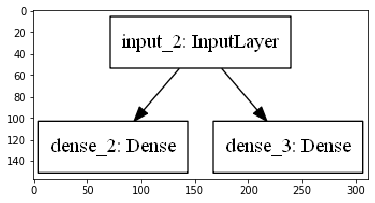

Epoch 1/10
10770/10770 [==============================] - 0s 17us/step - loss: nan - dense_2_loss: nan - dense_3_loss: 1.4465    
Epoch 2/10
10770/10770 [==============================] - 0s 12us/step - loss: nan - dense_2_loss: nan - dense_3_loss: 0.5420
Epoch 3/10
10770/10770 [==============================] - 0s 12us/step - loss: nan - dense_2_loss: nan - dense_3_loss: 0.5452
Epoch 4/10
10770/10770 [==============================] - 0s 12us/step - loss: nan - dense_2_loss: nan - dense_3_loss: 0.5437
Epoch 5/10
10770/10770 [==============================] - 0s 12us/step - loss: nan - dense_2_loss: nan - dense_3_loss: 0.5453
Epoch 6/10
10770/10770 [==============================] - 0s 13us/step - loss: nan - dense_2_loss: nan - dense_3_loss: 0.5440
Epoch 7/10
10770/10770 [==============================] - 0s 12us/step - loss: nan - dense_2_loss: nan - dense_3_loss: 0.5443
Epoch 8/10
10770/10770 [==============================] - 0s 12us/step - loss: nan - dense_2_loss: nan - dense_3_l

In [6]:
# two input and two output network

from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.models import Model
from scipy.special import expit as sigmoid


# Input layer (from previous exercise)
input_tensor = Input(shape=(2,))

# Create a dense layer
output_tensor_1 = Dense(1, activation='linear', use_bias=False)(input_tensor)
output_tensor_2 = Dense(1, activation='sigmoid', use_bias=False)(input_tensor)

model= Model(inputs=input_tensor, outputs=[output_tensor_1,output_tensor_2])

model.compile(loss=['mean_absolute_error', 'binary_crossentropy'], optimizer=Adam(0.01))

plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()
model.fit(df[['seed_diff','location']],
          [
              df[['score_diff']],df[['wins']]
          ],
            epochs=10,
          verbose=True,
          batch_size=64
         )

# Print the model weights
print(model.get_weights())

# Print the training data means
print(df.mean())